In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('dataset-stroke-data.csv')
#pd.describe_option()
#Options and setting resource: https://pandas.pydata.org/docs/user_guide/options.html
pd.options.display.max_rows
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content)

In [6]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 1.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
data.select_dtypes(include="category").columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [10]:
labels = ["gender", "ever_married", "work_type",
        "Residence_type", "smoking_status"]

In [11]:
cat_columns = data[labels]

feature_arr = ohe.fit_transform(cat_columns).toarray()

feature_labels = ohe.get_feature_names_out(labels)

features_df = pd.DataFrame(feature_arr, columns = feature_labels)

In [12]:
features_df.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
data_join = data.join(features_df)

pd.set_option('display.max_columns', None)

data_join.head()
#Alt method: data_join.head().T  --to show all columns

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
data_join.drop(["gender", "ever_married", "work_type",
        "Residence_type", "smoking_status"], axis=1, inplace=True)

In [15]:
data_join.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,NaN,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
data_join.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

** Fill na/NaN after encoding

In [17]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean', missing_values=np.NaN)

x_imputer = imputer.fit_transform(data_join[['bmi']])
data_join['bmi'] = x_imputer

#### EDA with Models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [91]:
X = data_join.drop('stroke', axis=1)
y = data_join['stroke']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [27]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
logic = LogisticRegression()

#pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
#pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestClassifier())])
#pipe

In [ ]:
#pipe = Pipeline(steps =[
 #   ('tf', transformer),
#]).set_output(transform="pandas")

#### SMOT technique to synthetically fill data to avoid bias

<Axes: xlabel='stroke'>

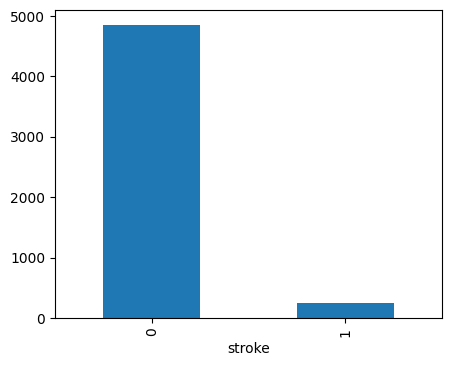

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))

y.value_counts().plot(kind='bar')

In [93]:
import imblearn
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#resource: https://medium.com/@HeCanThink/imbalanced-learn-the-art-of-balancing-and-sampling-data-in-python-%EF%B8%8F-ab62543e8030

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=1) 
                     
X, y = under.fit_resample(X_train, y_train)

In [94]:
y.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [45]:
#### decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
#from numpy import mean
#from sklearn.datasets import make_classification
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.tree import DecisionTreeClassifier
#from imblearn.pipeline import Pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
# define pipeline
##model = DecisionTreeClassifier()
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('over', over), ('under', under), ('model', model)]
#pipeline = Pipeline(steps=steps)
# evaluate pipeline
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores))



In [113]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, min_samples_split=2,
    max_depth=2, random_state=0)
clf.fit(X, y)
clf.score(X_test, y_test)

0.7436399217221135

In [115]:
clf = RandomForestClassifier(n_estimators=100, min_samples_split=3,
    max_depth=4, random_state=0)
clf.fit(X, y)
clf.score(X_test, y_test)

#Resource: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

0.8483365949119374

In [78]:
#Use from start

clf = BalancedRandomForestClassifier(n_estimators=100, min_samples_split=2,
   sampling_strategy="all", replacement=True, max_depth=2)
clf.fit(X, y)
clf.score(X_test, y_test)

0.8251928020565553

In [79]:
#Use from start

clf = BalancedRandomForestClassifier(n_estimators=100, min_samples_split=3,
   sampling_strategy="all", replacement=True, max_depth=4, random_state=0)
clf.fit(X, y)
clf.score(X_test, y_test)

0.8997429305912596

In [ ]:
####Scleing Data for Linear models:
#X_scaled_train = std.fit_transform(X_train)
#X_scaled_test = std.fit_transform(X_test)

In [116]:
#ROC score

y_pred = clf.predict(X_test)

In [119]:
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob[:10]

array([[0.74143831, 0.25856169],
       [0.84002219, 0.15997781],
       [0.94771547, 0.05228453],
       [0.69524499, 0.30475501],
       [0.93850885, 0.06149115],
       [0.51794866, 0.48205134],
       [0.66398977, 0.33601023],
       [0.92079663, 0.07920337],
       [0.54735738, 0.45264262],
       [0.78894864, 0.21105136]])

In [121]:
from sklearn.metrics import roc_curve


y_pos = y_pred_prob[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pos)

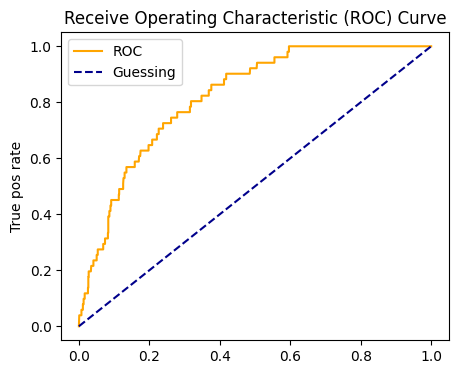

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))

def plot_roc(fpr, tpr):
    #plot roc curve
    plt.plot(fpr, tpr, color = 'orange', label = "ROC")
    
    #plot line with no predictive power or data
    plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = "--", label = "Guessing")
    
    #Customize plot
    plt.xlabel = "False pos rate"
    plt.ylabel("True pos rate")
    plt.title("Receive Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc(fpr, tpr)

#Resource (ROC/ Confusion matrix): https://medium.com/@lily_su/confusion-matrix-roc-auc-and-imbalanced-classes-in-logistic-regression-5c7ead3deefc

In [127]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pos) * 100)

81.8602209163789


In [ ]:
#Confusion Matrix

In [128]:
data_join_corr = data_join.corr()
data_join_corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388,-0.002144,0.001776,0.012984,-0.013690,0.013690,-0.000016,0.005459,0.023698,-0.019956,-0.013939,0.001403,-0.001403,-0.019243,0.007812,0.011426,0.001004
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,0.027924,-0.027623,-0.010659,-0.679125,0.679125,0.130013,-0.078653,0.116534,0.327989,-0.634215,-0.014180,0.014180,-0.378231,0.236897,0.119307,0.073133
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,-0.021143,0.021275,-0.004597,-0.164243,0.164243,0.017685,-0.021608,-0.005413,0.115442,-0.129506,0.007913,-0.007913,-0.141501,0.058853,0.065063,0.031240
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,-0.085617,0.085717,-0.003343,-0.114644,0.114644,0.001330,-0.015712,0.000027,0.086760,-0.091634,-0.003092,0.003092,-0.066731,0.066804,-0.021856,0.044049
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,-0.054902,0.054580,0.011489,-0.155068,0.155068,0.013845,-0.014675,0.016588,0.062694,-0.102250,0.004946,-0.004946,-0.095131,0.068111,0.023885,0.017646
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,0.025797,-0.025464,-0.011802,-0.335705,0.335705,0.077942,-0.028600,0.203884,0.070822,-0.442843,0.000120,-0.000120,-0.264956,0.104257,0.106220,0.085579
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,-0.009027,0.009117,-0.003166,-0.108340,0.108340,0.002677,-0.014882,0.011888,0.062168,-0.083869,-0.015458,0.015458,-0.055892,0.064556,-0.004129,0.008939
gender_Female,-0.002144,0.027924,-0.021143,-0.085617,-0.054902,0.025797,-0.009027,1.000000,-0.999597,-0.016642,-0.030483,0.030483,0.016685,-0.011469,0.032294,0.026143,-0.089120,-0.006340,0.006340,-0.059393,-0.043603,0.099111,-0.011306
gender_Male,0.001776,-0.027623,0.021275,0.085717,0.054580,-0.025464,0.009117,-0.999597,1.000000,-0.011757,0.029936,-0.029936,-0.016534,0.011496,-0.032639,-0.025971,0.089283,0.005937,-0.005937,0.059658,0.042738,-0.098813,0.011477
gender_Other,0.012984,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.016642,-0.011757,1.000000,0.019327,-0.019327,-0.005374,-0.000920,0.012092,-0.006112,-0.005514,0.014217,-0.014217,-0.009206,0.030568,-0.010728,-0.005978


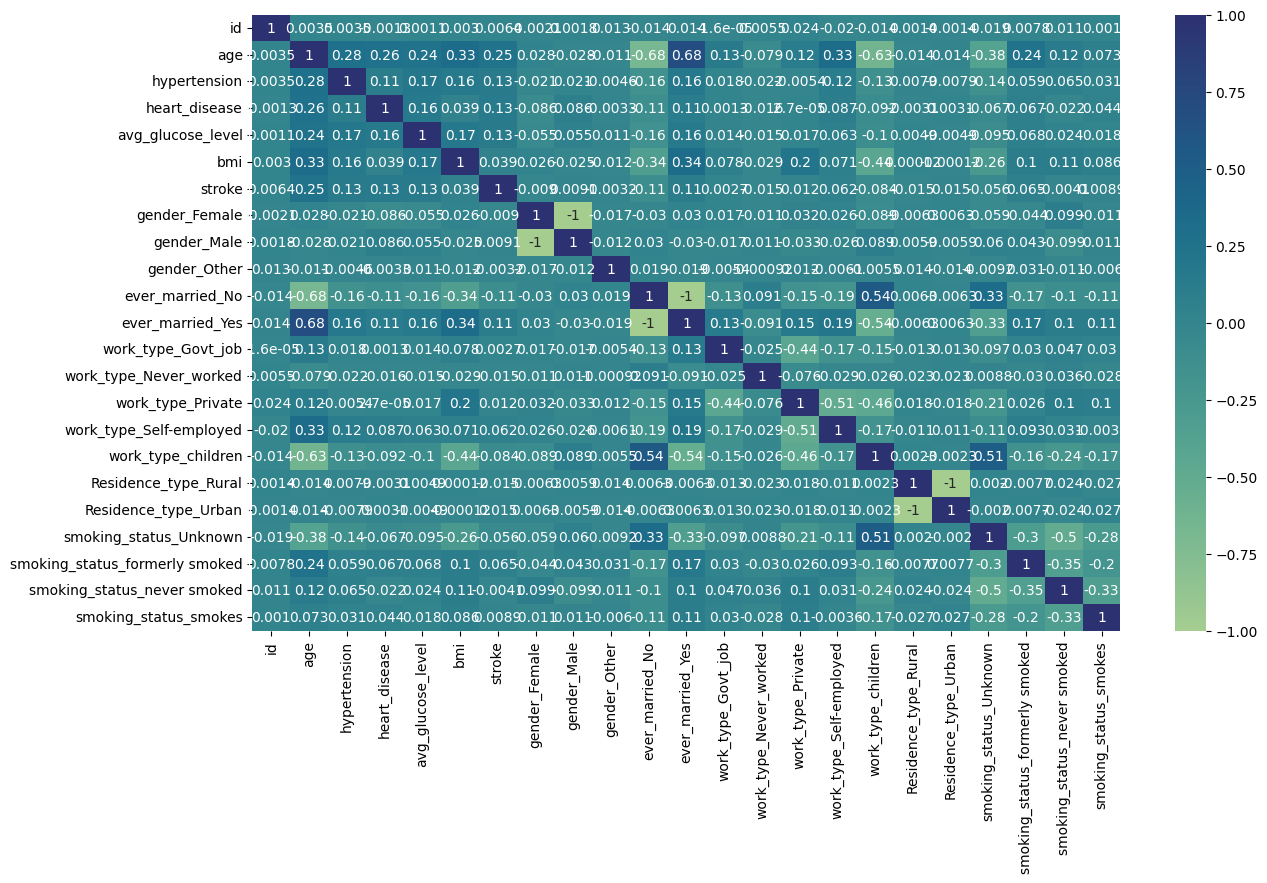

In [134]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (14,8))
ax = sns.heatmap(data_join_corr, annot = True,
                cbar = True, cmap = "crest",
                xticklabels = True)
plt.show()

In [136]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.86      0.92       971
           1       0.18      0.57      0.27        51

    accuracy                           0.85      1022
   macro avg       0.58      0.72      0.59      1022
weighted avg       0.93      0.85      0.88      1022



In [141]:
#from sklearn.pipeline import Pipeline
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier


#pipe2 = Pipeline(steps =[
 #   ('tf2', DecisionTreeClassifier()),
#("forest", KNeighborsClassifier())])   #.set_output(transform="pandas")

In [140]:
#pipe2.fit(X_train, y_train)

In [142]:
#In future start with Pipeline that incldues multiple models for more parameter options
#With Pipeline use "--" before param
from sklearn.model_selection import RandomizedSearchCV


#Create hyperparameter grid for RandomForestClassifier
clf_params = {
    'n_estimators': np.arange(100,200,10),
    'max_depth' : np.arange(2,11,1),
    'max_features': ['sqrt', 'log2'],
    'class_weight' :['balanced','balanced_subsample'],
    'criterion' :['gini', 'entropy']
    }

In [143]:
rand = RandomizedSearchCV(clf, param_distributions=clf_params,
                         cv=5, n_iter=20)

rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=4,
                                                    min_samples_split=3,
                                                    random_state=0),
                   n_iter=20,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])})

In [144]:
rand.best_params_

{'n_estimators': 160,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample'}

In [145]:
rand.best_score_

0.9327275230208916

In [146]:
clf = RandomForestClassifier(n_estimators=160, max_features='sqrt',
        max_depth=10, criterion='gini', class_weight='balanced_subsample')
clf

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=160)

In [148]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9207436399217221

In [149]:
#Trying different n_estimators

#np.random.seed(10)

#for i in range(10, 100, 10):
#    print(f"Model with {i} estimators:")
#    rfc = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
#    print(f"Model accuracy on test data set: {rfc.score(x_test, y_test) * 100: .2f}%")
    #print(round(rfc.score(x_test, y_test) * 100,2))

In [189]:
#Feature importaance
from sklearn.inspection import permutation_importance

 
# get importance
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

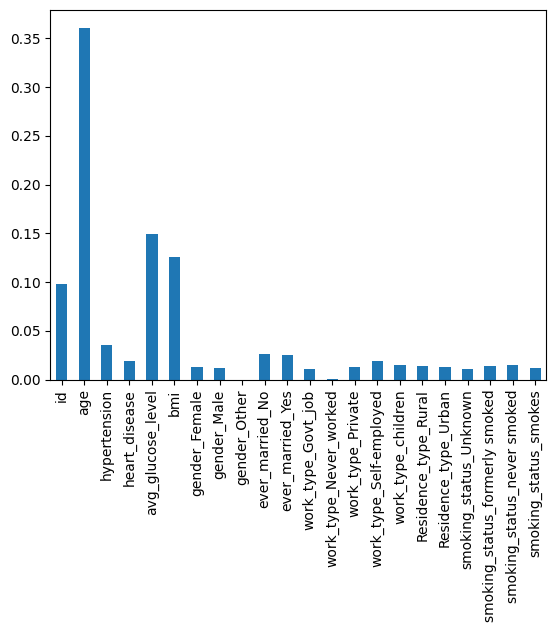

In [190]:
importances = pd.Series(clf.feature_importances_, index=X.columns).plot(kind="bar")


In [198]:
pd.DataFrame(clf.feature_importances_, X.columns)

,0
id,0.097599
age,0.361015
hypertension,0.035884
heart_disease,0.019090
avg_glucose_level,0.148777
bmi,0.125768
gender_Female,0.012432
gender_Male,0.012077
gender_Other,0.000000
ever_married_No,0.025675


In [204]:
#SHAP
pip install shap

#import shap

SyntaxError: invalid syntax (3623823803.py, line 2)

In [ ]:
import shap

explainer = shap.Explainer(reg)
shap_values = explainer(x_test)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))  #Cohort plot
#Resource: https://medium.com/dataman-in-ai/the-shap-with-more-elegant-charts-bc3e73fa1c0c

In [ ]:
shap.decision_plot(explainer.expected_value, explainer.shap_values(x_test), x_test.columns)


In [ ]:
shap.summary_plot(shap_values)


In [ ]:
shap_df = pd.DataFrame(shap_values.values, columns=shap_values.feature_names,
                      index=x_test.index)
shap_df.head()

In [206]:
#Decision Tree Visualization

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [234]:
# Step 2: Make an instance of the Model
trees = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
# Step 3: Train the model on the data
trees.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(0.5, 0.8333333333333334, 'x[1] <= 67.5\ngini = 0.092\nsamples = 4088\nvalue = [3890, 198]'),
 Text(0.25, 0.5, 'x[1] <= 53.5\ngini = 0.044\nsamples = 3408\nvalue = [3332, 76]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.018\nsamples = 2586\nvalue = [2563, 23]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.121\nsamples = 822\nvalue = [769, 53]'),
 Text(0.75, 0.5, 'x[4] <= 104.095\ngini = 0.294\nsamples = 680\nvalue = [558, 122]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.24\nsamples = 388\nvalue = [334, 54]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.357\nsamples = 292\nvalue = [224, 68]')]

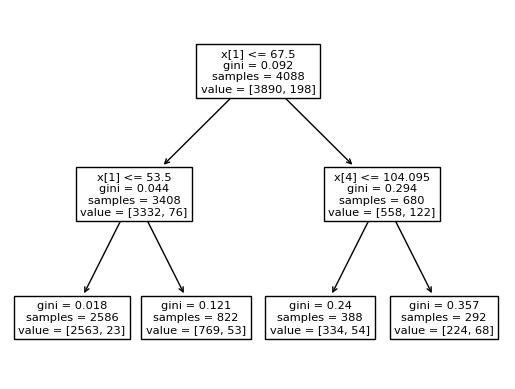

In [235]:
tree.plot_tree(trees)

In [219]:
tree.score(X_test, y_test)

0.9500978473581213

In [221]:
accuracy_score(y_test, y_pred)

0.8483365949119374

In [216]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [232]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [226]:
X.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [261]:
#plt.figure(figsize=(25,10))    #Look into
#a = plot_tree(trees, 
 #             feature_names=X.columns, 
  #            class_names= data_join.stroke[int(index[0])],
   #           filled=True, 
    #          rounded=True, 
     #         fontsize=14)